## PROJET AIRBNB MACHINE LEARNING

MACCIONE Gabriel


MALONGO Cyrille

MARONNE Julien

## Installation

Liste of all libraries to import

In [1]:
# List of essential libraries (Retrieve data from CSV files + plot curves)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot the map (Visualization)
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# To digitize data
from sklearn.preprocessing import LabelEncoder

# For the prediction model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# To calculate errors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# To test other models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor

In [8]:
# The essentials
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

# For the map
!pip install geopandas
!pip install contextily
!pip install shapely

# For the machin learning
!pip install scikit-learn
!pip install xgboost
!pip install lightgbm

## Exploration

In [40]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [13]:
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that the feature 12 : last_review, contains only 38843 compared to many others that have 48895. So we may delete some rows

In [15]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

The price is 0, so we have outliers that we will need to clean up.

In [34]:
df.shape

(48895, 16)

# Visualisation

Here is a nice map showing the distribution of log_price values.


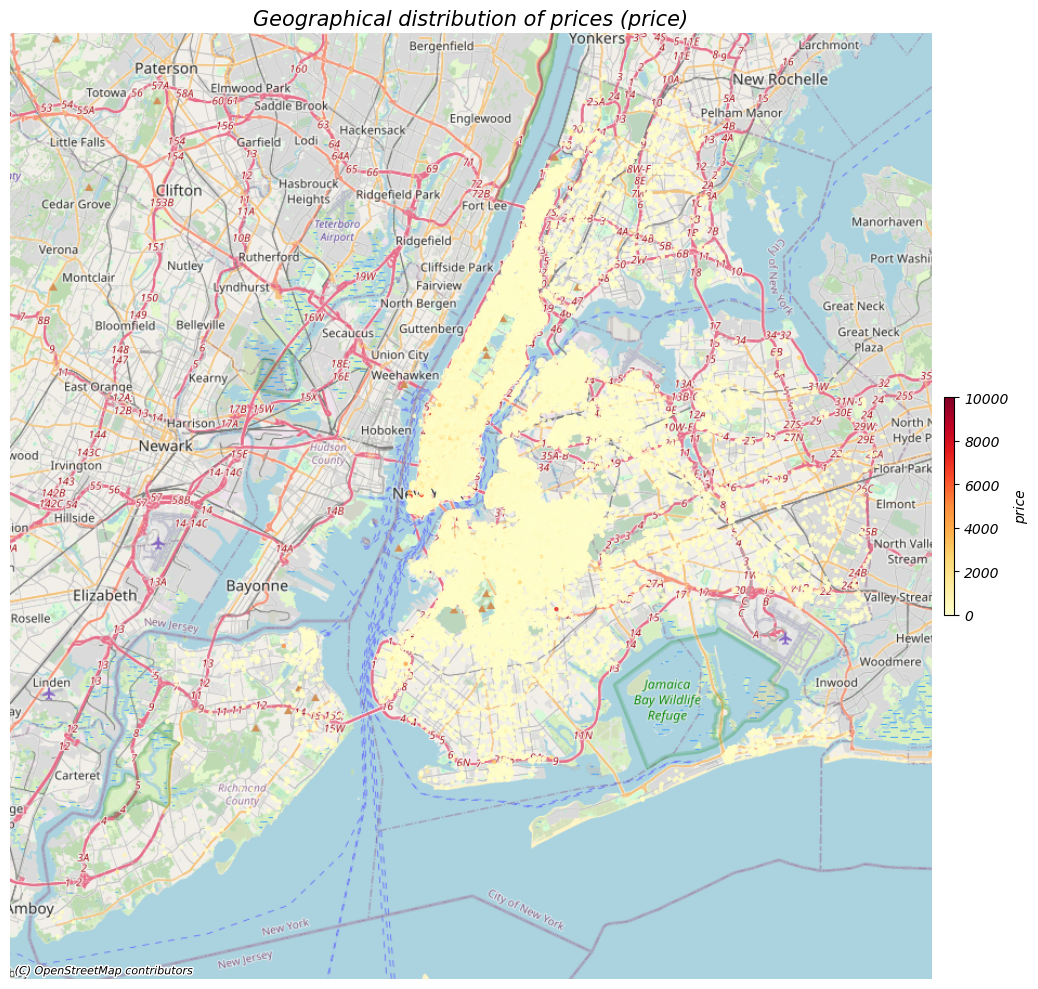

In [42]:
# Clean the data (keep only valid points)
df_map = df.dropna(subset=['latitude', 'longitude', 'price']).copy()

# Create geometric objects (points)
geometry = [Point(xy) for xy in zip(df_map["longitude"], df_map["latitude"])]
gdf = gpd.GeoDataFrame(df_map, geometry=geometry, crs="EPSG:4326")  # GPS coordinates

# Convert to web projection (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Create the figure
fig, ax = plt.subplots(figsize=(12, 10))

# Scatter plot of points based on their log_price
gdf.plot(
    ax=ax,
    column="price",
    cmap="YlOrRd",
    markersize=5,
    legend=True,
    alpha=0.7,
    legend_kwds={
        'shrink': 0.23,         # Reduce the colorbar height
        'label': "price",   # Colorbar title
        'orientation': "vertical",
        'pad': 0.01,            # Space between the map and the colorbar
    }
)

# Add basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Clean up the rendering
ax.set_axis_off()
plt.title("Geographical distribution of prices (price)", fontsize=15)
plt.tight_layout()
plt.show()


We note that the majority of Airbnbs are yellow, meaning they have a relatively low price, but there are outliers, so it seems reasonable to convert the price to a log price to obtain values that are more easily predictable and more spread out.

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12924\795454184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


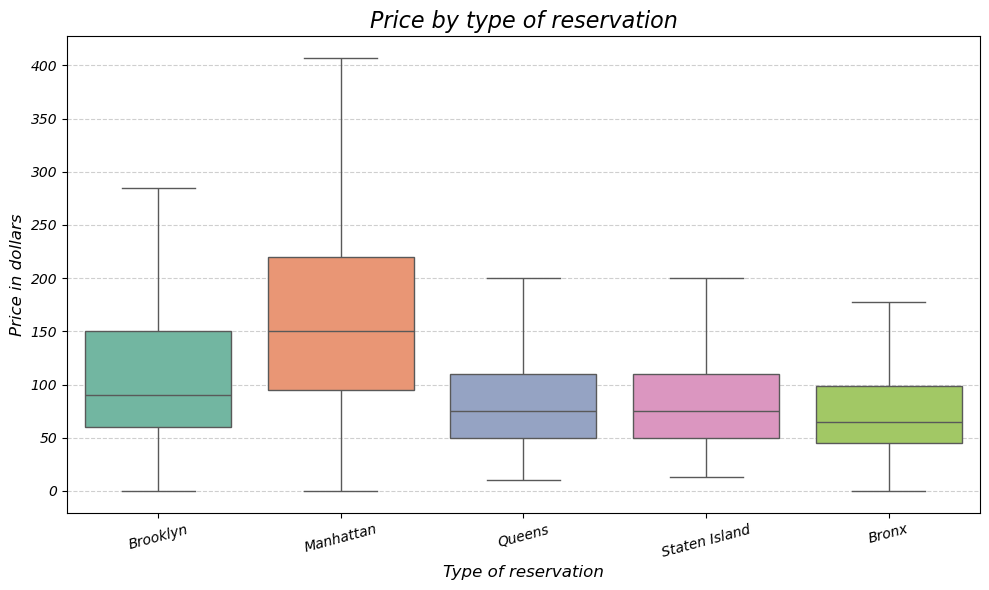

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='neighbourhood_group', 
    y='price', 
    palette='Set2',
    showfliers=False  # remove extreme values for see better the box
)

plt.title("Price by type of reservation", fontsize=16)
plt.xlabel("Type of reservation", fontsize=12)
plt.ylabel("Price in dollars", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Here we see that Manhattan is the wealthiest neighborhood, demonstrating the importance of the neighborhood_group feature.

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12924\1874503211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


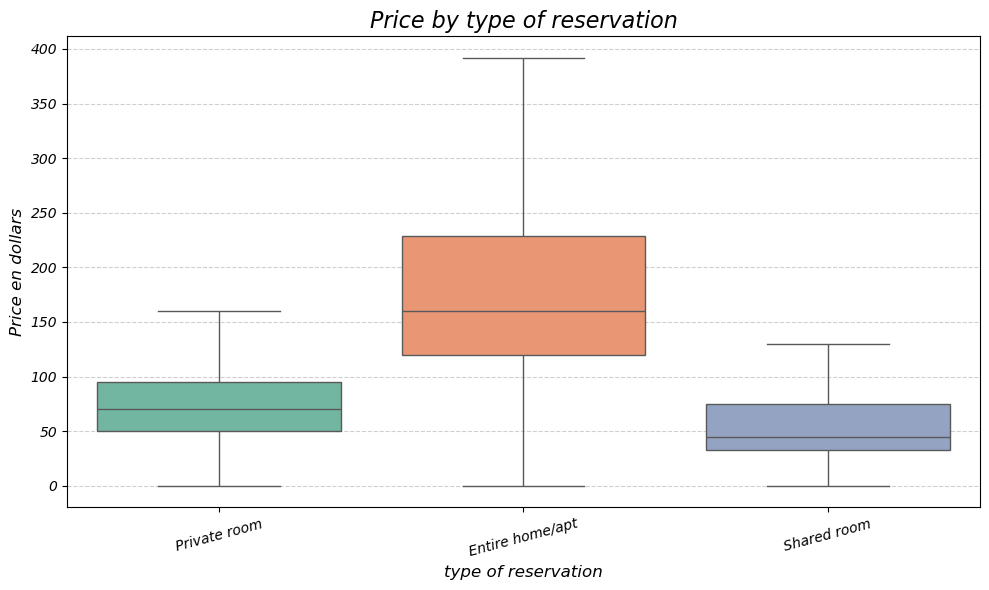

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='room_type', 
    y='price', 
    palette='Set2',
    showfliers=False  # retire les valeurs extrêmes pour mieux voir la boîte
)

plt.title("Price by type of reservation", fontsize=16)
plt.xlabel("type of reservation", fontsize=12)
plt.ylabel("Price en dollars", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


We can see here that “entire homes/apartments” are the most expensive, so the room_type feature is important.

Visualization that allows you to check the price distribution.

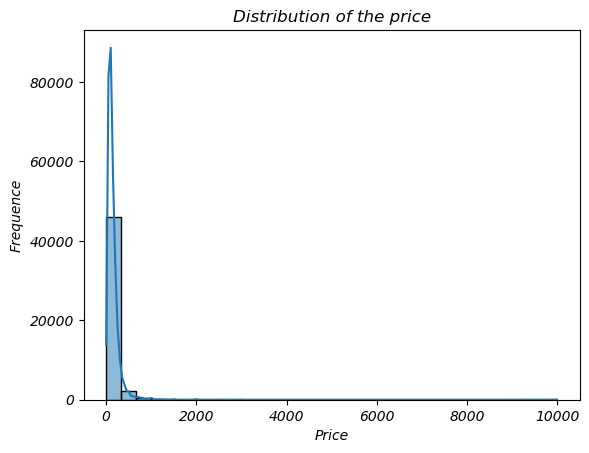

In [46]:
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribution of the price")
plt.xlabel("Price in dollars")
plt.ylabel("Frequence")
plt.show()

Once again, we see that there are outliers, notably “10000,” which it would be interesting to remove or simply normalize with a logarithm.

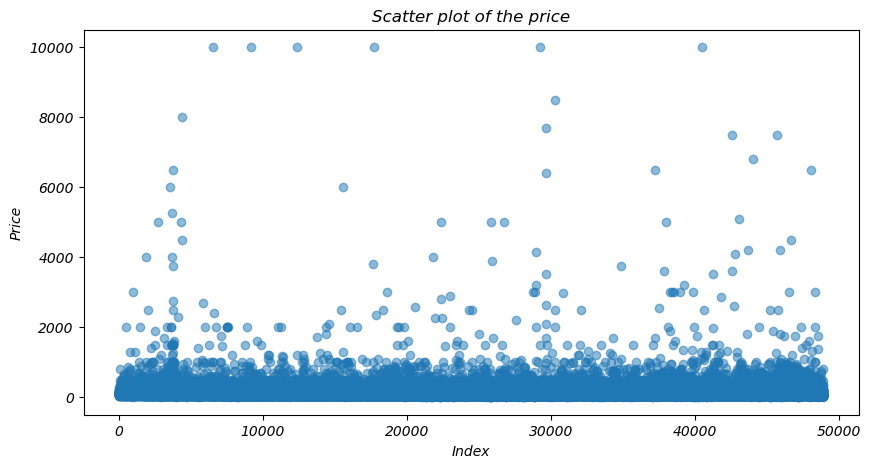

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(df.index, df['price'], alpha=0.5)
plt.title("Scatter plot of the price")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

This graphe confirms some outliers.

# Cleaning

Text data is converted into information that can be used by a machine learning algorithm.

In [20]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Missing')
    freq = df[col].value_counts(normalize=True)
    df[col] = df[col].map(freq)

In [44]:
df.head()

id     name  host_id  host_name  neighbourhood_group  neighbourhood  \
0  2539  0.00002     2787   0.006014             0.411075       0.003580   
1  2595  0.00002     2845   0.003150             0.443090       0.031605   
2  3647  0.00002     4632   0.000266             0.443090       0.054374   
3  3831  0.00002     4869   0.000020             0.411075       0.011701   
4  5022  0.00002     7192   0.003723             0.443090       0.022850   

   latitude  longitude  room_type  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237   0.456571               1                  9   
1  40.75362  -73.98377   0.519741               1                 45   
2  40.80902  -73.94190   0.456571               3                  0   
3  40.68514  -73.95976   0.519741               1                270   
4  40.79851  -73.94399   0.519741              10                  9   

   last_review  reviews_per_month  calculated_host_listings_count  \
0     0.000184               0.21                               6   
1     0.002393               0.38                               2   
2     0.205609                NaN                               1   
3     0.011865               4.64                               1   
4     0.000430               0.10                               1   

   availability_365  price_log  
0               365   5.010635  
1               355   5.420535  
2               365   5.017280  
3               194   4.499810  
4                 0   4.394449

We remove price = 0 because it is not realistic or logical. 

We will observe how our data has changed.


In [21]:
df = df[df['price'] > 0]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48868 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48863 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  last_review                     38833

In [38]:
df.shape

(48884, 16)

We can see that 11 lines have been deleted.

In [22]:
df = df.dropna()


In [44]:
df.shape

(38833, 13)

We can see that more than 10 000 lines have been deleted

We will now log the price so that the values are better distributed.

In [23]:
df['price_log'] = np.log1p(df['price'])
df = df.drop(columns=['price'])


Let's trace the map of New York to see the different developments.

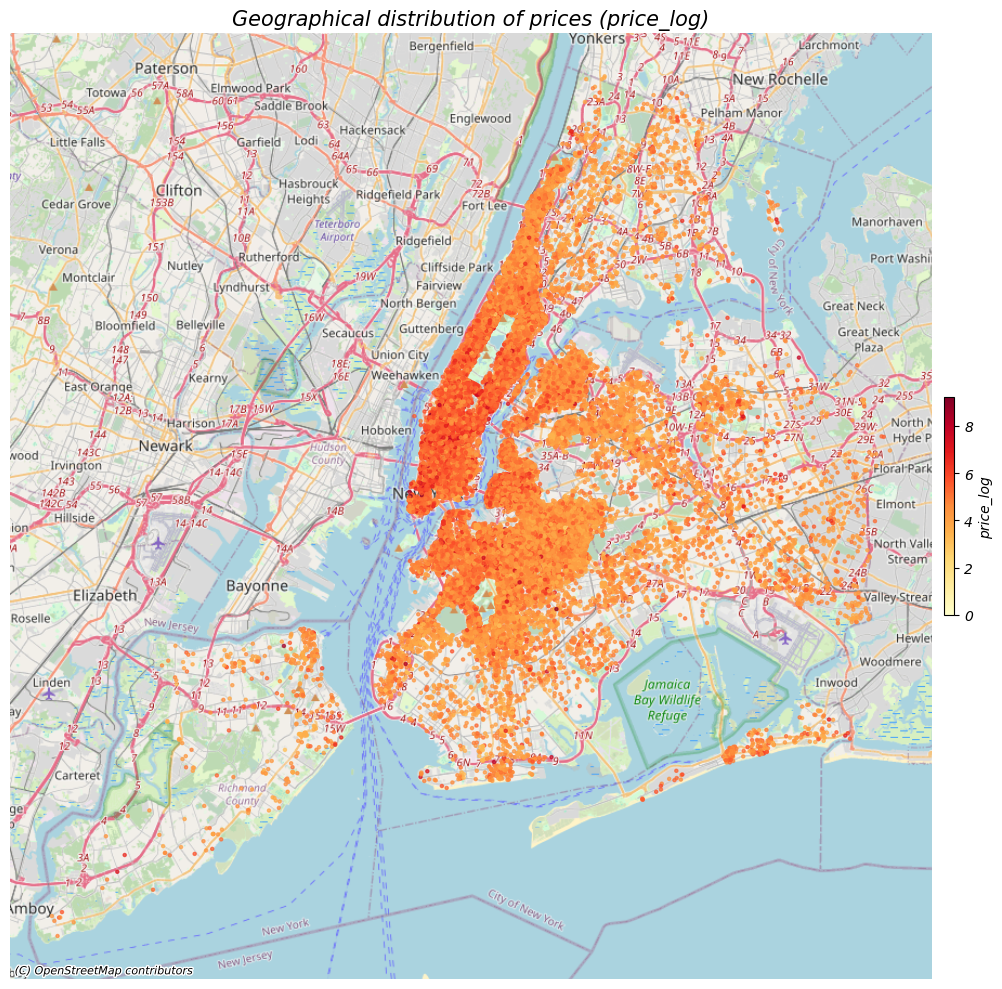

In [16]:
# Clean the data (keep only valid points)
df_map = df.dropna(subset=['latitude', 'longitude', 'price_log']).copy()

# Create geometric objects (points)
geometry = [Point(xy) for xy in zip(df_map["longitude"], df_map["latitude"])]
gdf = gpd.GeoDataFrame(df_map, geometry=geometry, crs="EPSG:4326")  # GPS coordinates

# Convert to web projection (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Create the figure
fig, ax = plt.subplots(figsize=(12, 10))

# Scatter plot of points based on their log_price
gdf.plot(
    ax=ax,
    column="price_log",
    cmap="YlOrRd",
    markersize=5,
    legend=True,
    alpha=0.7,
    legend_kwds={
        'shrink': 0.23,         # Reduce the colorbar height
        'label': "price_log",   # Colorbar title
        'orientation': "vertical",
        'pad': 0.01,            # Space between the map and the colorbar
    }
)

# Add basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Clean up the rendering
ax.set_axis_off()
plt.title("Geographical distribution of prices (price_log)", fontsize=15)
plt.tight_layout()
plt.show()


We obtain a graph that is more meaningful than the first one given our operation on the price, and we can clearly see a concentration of prices based on proximity.

We can re-observe the distribution of the price.

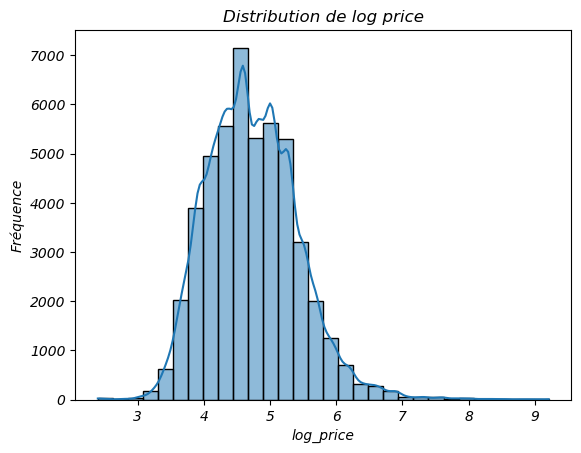

In [61]:
sns.histplot(df['price_log'], kde=True, bins=30)
plt.title("Distribution of log price")
plt.xlabel("log_price")
plt.ylabel("Frequence")
plt.show()

First and foremost, in order to avoid overfitting, it seems logical to remove data that is clearly useless, such as host_id, which could skew our model.

It is estimated that longitude and latitude are represented by neighborhood_group, so it would not be relevant to keep them and could lead to potential overfitting.

In [24]:
# List of columns to remove
columns_to_drop = ['latitude', 'longitude', 'host_id']

# Drop them in place
df.drop(columns=columns_to_drop, inplace=True)
print(df)



             id     name  host_name  neighbourhood_group  neighbourhood  \
0          2539  0.00002   0.006013             0.411167       0.003579   
1          2595  0.00002   0.003150             0.443011       0.031598   
3          3831  0.00002   0.000020             0.411167       0.011699   
4          5022  0.00002   0.003722             0.443011       0.022845   
5          5099  0.00002   0.003722             0.443011       0.009919   
...         ...      ...        ...                  ...            ...   
48782  36425863  0.00002   0.000020             0.443011       0.036773   
48790  36427429  0.00002   0.000123             0.115881       0.008713   
48799  36438336  0.00002   0.002761             0.007629       0.000205   
48805  36442252  0.00002   0.000061             0.022313       0.001227   
48852  36455809  0.00002   0.001759             0.411167       0.050414   

       room_type  minimum_nights  number_of_reviews  last_review  \
0       0.456611               

We can see that the distribution is much more spread out, like a Gaussian curve, and therefore easier for the algorithm to predict.

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12924\978146738.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_price_corr_sorted.values, y=log_price_corr_sorted.index, palette='coolwarm')


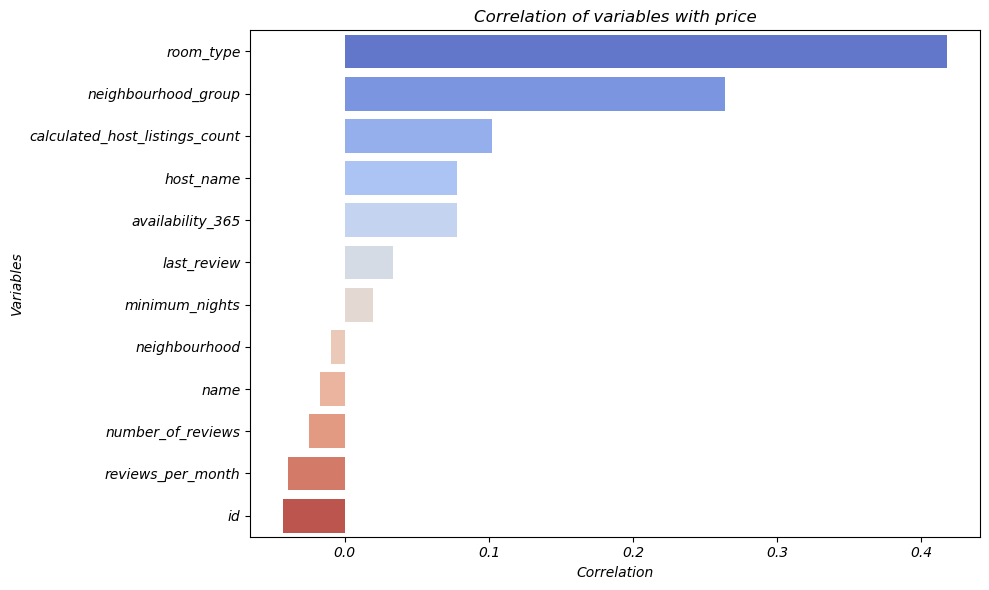

In [25]:
# Compute the correlation matrix (numeric columns only)
correlation_matrix = df.corr(numeric_only=True)

# Extract the correlation with log_price, removing log_price itself
log_price_corr = correlation_matrix['price_log'].drop('price_log')

# Sort the values in descending order
log_price_corr_sorted = log_price_corr.sort_values(ascending=False)

# Display a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=log_price_corr_sorted.values, y=log_price_corr_sorted.index, palette='coolwarm')
plt.title('Correlation of variables with price')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


As confirmed by our visualizations, the neighborhood_group and room_type features have the greatest impact. It therefore seems logical to remove the columns: name and even neighborhood, which ultimately do not provide any more information than neighborhood_group.

In [26]:
# List of columns to remove
columns_to_drop = ['neighbourhood', 'name']

# Drop them in place
df.drop(columns=columns_to_drop, inplace=True)
print(df)



             id  host_name  neighbourhood_group  room_type  minimum_nights  \
0          2539   0.006013             0.411167   0.456611               1   
1          2595   0.003150             0.443011   0.519665               1   
3          3831   0.000020             0.411167   0.519665               1   
4          5022   0.003722             0.443011   0.519665              10   
5          5099   0.003722             0.443011   0.519665               3   
...         ...        ...                  ...        ...             ...   
48782  36425863   0.000020             0.443011   0.456611               1   
48790  36427429   0.000123             0.115881   0.456611               1   
48799  36438336   0.002761             0.007629   0.456611               1   
48805  36442252   0.000061             0.022313   0.519665               1   
48852  36455809   0.001759             0.411167   0.456611               1   

       number_of_reviews  last_review  reviews_per_month  \
0  

## Learning

In [27]:
y = df['price_log']
X = df.drop(columns=['price_log'])  # Remove 'price_log' from the features

# Train/test split(80/20) for validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns 
numeric_features = [col for col in X_train.columns if pd.api.types.is_numeric_dtype(X_train[col])]
categorical_features = [col for col in X_train.columns if pd.api.types.is_string_dtype(X_train[col])]

# Pipelines 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline with XGBRegressor 
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

# Training 
model.fit(X_train, y_train)

# Predictions on validation set 
y_valid_pred = model.predict(X_valid)

# Save predictions 
pd.DataFrame({'price_log': y_valid_pred}).to_csv('predictions.csv', index=False)
print("Predictions saved in predictions.csv")


Predictions saved in predictions.csv


In [28]:
df_final = pd.read_csv("predictions.csv")
print(df_final)

      price_log
0      4.516172
1      5.112549
2      4.580191
3      5.010290
4      5.511200
...         ...
7762   4.056638
7763   4.434992
7764   4.572589
7765   5.533790
7766   5.076112

[7767 rows x 1 columns]


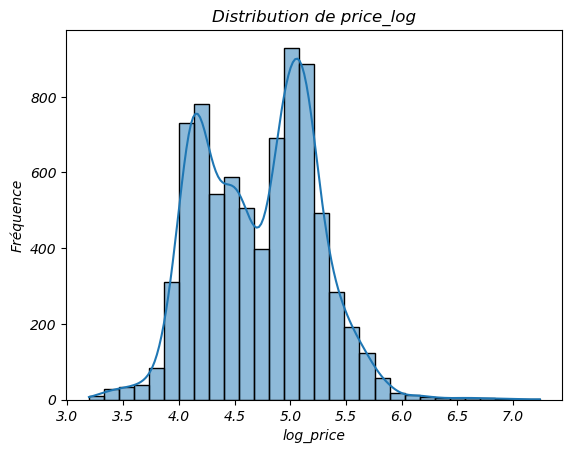

In [29]:
sns.histplot(df_final['price_log'], kde=True, bins=30)
plt.title("Distribution of price_log")
plt.xlabel("log_price")
plt.ylabel("Frequency")
plt.show()

We can see that this model appears consistent, but that the distribution of log_price is slightly different. However, we find something quite similar to the visualization of the entire df.

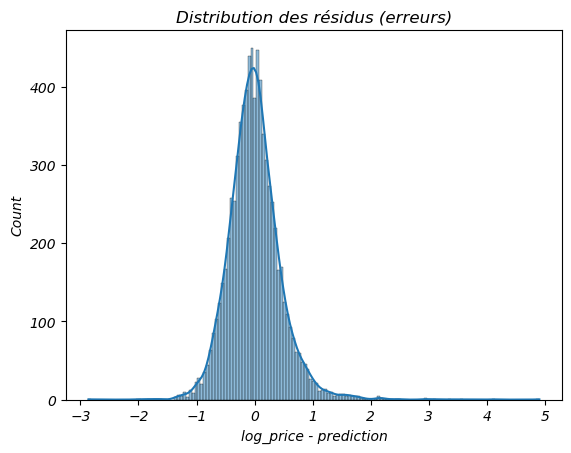

In [30]:
# Predictions on validation set
residuals = y_valid - y_valid_pred

sns.histplot(residuals, kde=True)
plt.title("Distribution of residuals (errors)")
plt.xlabel("log_price - prediction")
plt.show()

It is clear that the majority of errors are between -0.5 and 0.5 for a log_price, i.e., less than a factor of 10 for a price.
And approximately 99% of errors are between -1 and 1.
Our model therefore appears to be fairly accurate.

In [31]:
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print(f"Root Mean Squared Error (RMSE) sur train : {rmse:.3f}")

Root Mean Squared Error (RMSE) sur train : 0.449


The R2 score is a regression score. It is 1 if the prediction is perfect, 0 if the predicted value is the mean of $y$. And negative scores if the prediction is worse than predicting the mean (i.e., really bad) with the y_train.

In [32]:
print(f"Validation score: {r2_score(y_true=y_valid, y_pred=y_valid_pred)}")

Score en train : 0.5362437606893247


We have a score of 53% of the variability in log_price explained by this model, so this model seems irrelevant and needs to be improved.

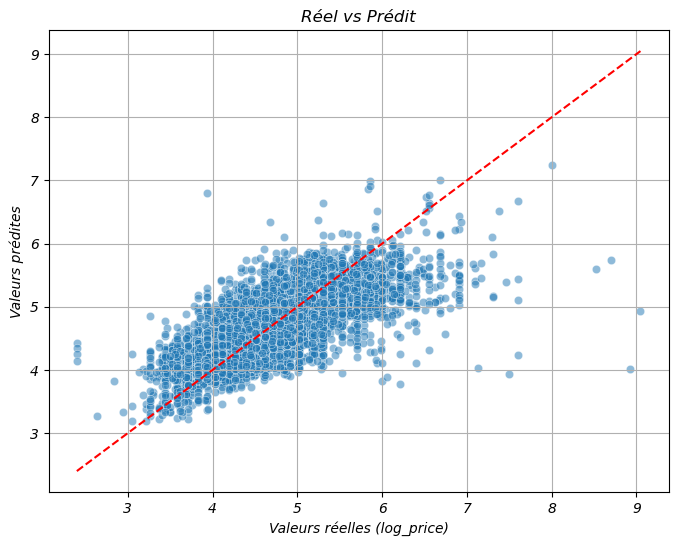

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_valid, y=y_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', linestyle='--')
plt.xlabel("Real values (price_log)")
plt.ylabel("Predicted values")
plt.title("Real vs predicted")
plt.grid(True)
plt.show()

We can see that many points are fairly centered around the red curve, but some points are scattered.
Now we will test several models to evaluate their effectiveness. 

In [36]:
# Target and features
y_train = df['price_log']
X_train = df.drop(columns=['price_log'])
X_test = df.copy()

# Split 80% for training and 20% for validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Column preparation
numeric_features = [col for col in X_train.columns if pd.api.types.is_numeric_dtype(X_train[col])]
categorical_features = [col for col in X_train.columns if pd.api.types.is_string_dtype(X_train[col])]

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# List of models to test
models = {
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42)
}

# Model evaluation
results = []

for name, regressor in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    
    pipeline.fit(X_train, y_train)
    y_valid_pred = pipeline.predict(X_train)
    
    r2 = r2_score(y_train, y_valid_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_valid_pred))
    
    results.append({
        'Model': name,
        'R² (train)': round(r2, 4),
        'RMSE (train)': round(rmse, 4)
    })

# Display the comparison table
results_df = pd.DataFrame(results).sort_values(by='R² (train)', ascending=False)
print(results_df)



C:\Users\Gabriel\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.01057e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 31066, number of used features: 10
[LightGBM] [Info] Start training from score 4.707392
             Modèle  R² (train)  RMSE (train)
1      RandomForest      0.9376        0.1640
0           XGBoost      0.7034        0.3576
4          LightGBM      0.6121        0.4089
3  GradientBoosting      0.5594        0.4358
2             Ridge      0.2551        0.5666


## Prediction on the file test

We observe that the RandomForest model obtains the best scores, so we conclude that it is the best model.

In [37]:
#  Detect numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

#  Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#  Combine everything in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#  Full pipeline with RandomForest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

#  Train the model
pipeline.fit(X_train, y_train)

#  Predict on X_test
y_pred = pipeline.predict(X_test)

#  Create the output CSV file
df_final = pd.DataFrame({'id': id, 'price_log': y_pred})
df_final.to_csv('predictions_random_forest.csv', index=False)

print("Predictions saved in predictions_random_forest.csv")

Predictions saved in predictions_random_forest.csv


We observe the relevance of the Random Forest model by splitting the dataset into 80/20 (train/test). 

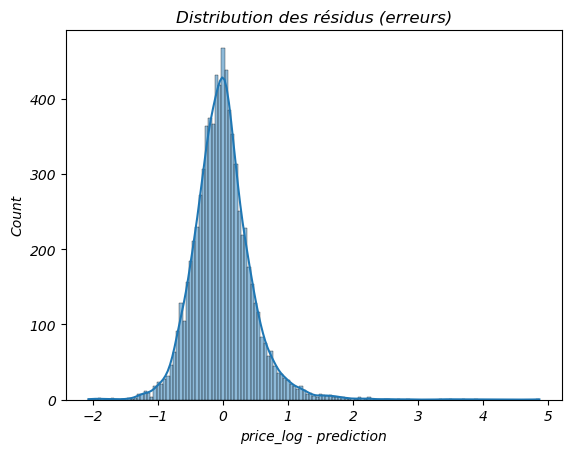

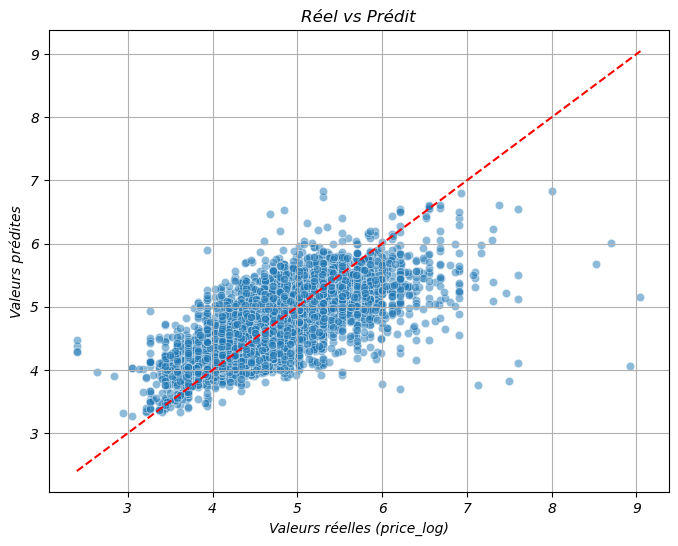

In [38]:
# Predictions on validation set
y_valid_pred = pipeline.predict(X_valid)
residuals = y_valid - y_valid_pred

# Residual distribution
sns.histplot(residuals, kde=True)
plt.title("Distribution of residuals (errors)")
plt.xlabel("price_log - prediction")
plt.show()

# Real vs Predicted scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_valid, y=y_valid_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', linestyle='--')
plt.xlabel("Actual values (price_log)")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

We can see that the points are very compact and close to the red dotted line, which
means that the model is very effective. However, some points seem quite far away, which reflects the complexity of predicting certain prices.
We can see that the points remain very close to the red curve, which means that the error in our model is very low, hence the scores obtained: R² score: 0.9376 ; RMSE error: 0.1640.

In [39]:
df_final_test = pd.DataFrame({'price_log': y_valid_pred})
print(df_final_test)

      price_log
0      4.470167
1      5.183871
2      4.862145
3      5.370340
4      5.466041
...         ...
7762   4.336488
7763   4.561012
7764   4.545988
7765   5.413723
7766   5.334360

[7767 rows x 1 columns]


Our file containing the above results is: predictions_random_forest.csv. It should appear in your files after compiling the code.

## Thank you for following our study !